In [1]:
from sdgym import load_dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import xgboost as xgb

In [4]:
%matplotlib inline

In [5]:
dataset_name = 'ring'
data, categorical_columns, ordinal_columns = load_dataset(dataset_name)

In [6]:
data

array([[ 0.83407491, -0.00998569],
       [ 0.61961212, -0.25594442],
       [ 0.77672799,  0.47681859],
       ...,
       [ 0.96213219,  0.92987828],
       [-1.15599179, -0.45208055],
       [ 0.38625999,  0.5708282 ]])

In [7]:
data.shape

(10000, 2)

(array([  3.,   4.,   8.,  15.,  53.,  70.,  76., 148., 182., 217., 294.,
        362., 344., 391., 377., 332., 280., 246., 220., 201., 159., 180.,
        217., 260., 332., 294., 278., 254., 212., 171., 174., 179., 232.,
        291., 306., 365., 377., 380., 326., 316., 273., 202., 141.,  87.,
         85.,  45.,  14.,  12.,  10.,   5.]),
 array([-1.69695032, -1.62950694, -1.56206356, -1.49462018, -1.4271768 ,
        -1.35973342, -1.29229005, -1.22484667, -1.15740329, -1.08995991,
        -1.02251653, -0.95507315, -0.88762977, -0.82018639, -0.75274301,
        -0.68529963, -0.61785625, -0.55041287, -0.48296949, -0.41552611,
        -0.34808273, -0.28063935, -0.21319597, -0.1457526 , -0.07830922,
        -0.01086584,  0.05657754,  0.12402092,  0.1914643 ,  0.25890768,
         0.32635106,  0.39379444,  0.46123782,  0.5286812 ,  0.59612458,
         0.66356796,  0.73101134,  0.79845472,  0.8658981 ,  0.93334148,
         1.00078485,  1.06822823,  1.13567161,  1.20311499,  1.27055837,
 

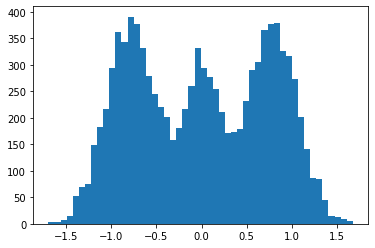

In [8]:
plt.hist(data[:, 0], bins=50)

In [9]:
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [10]:
import logging 

In [11]:
logging.basicConfig(level=logging.INFO)

In [12]:
clf = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [13]:
#kde = KDECopulaNNPdf(rho=0.2, clf=MLPClassifier(random_state=0, max_iter=1000))
#kde = KDECopulaNNPdf(rho=0.2, clf=clf)
kde = KDECopulaNNPdf(use_KDE=False, n_uniform_bins=50)
#kde.max_scale_value = 500

In [14]:

kde = kde.fit(data)

INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.
Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00, 10.51it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 3.968253573412649


In [15]:
# clf=svm
kde.score(data)

-16935.556570706824

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,  12.,
         15.,  32.,  49.,  77., 119., 173., 249., 330., 432., 533., 638.,
        724., 788., 826., 824., 787., 724., 638., 537., 427., 332., 249.,
        172., 120.,  79.,  44.,  29.,  19.,  13.,   2.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-5.19933758e+00, -4.99136408e+00, -4.78339058e+00, -4.57541707e+00,
        -4.36744357e+00, -4.15947007e+00, -3.95149656e+00, -3.74352306e+00,
        -3.53554956e+00, -3.32757605e+00, -3.11960255e+00, -2.91162905e+00,
        -2.70365554e+00, -2.49568204e+00, -2.28770854e+00, -2.07973503e+00,
        -1.87176153e+00, -1.66378803e+00, -1.45581452e+00, -1.24784102e+00,
        -1.03986752e+00, -8.31894013e-01, -6.23920510e-01, -4.15947007e-01,
        -2.07973503e-01,  4.89217555e-11,  2.07973503e-01,  4.15947007e-01,
         6.23920510e-01,  8.31894013e-01,  1.03986752e+00,  1.24784102e+00,
         1.45581452e+00,  1.66378803e+00,  1.87176

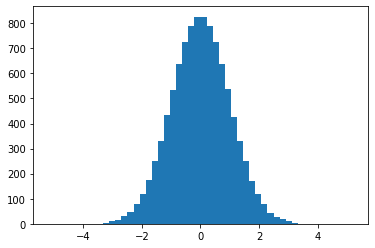

In [16]:
i=0
X_g = kde.pipe_[0].transform(data)
plt.hist(X_g[:, i], bins=50)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   7.,   3.,  11.,  20.,
         34.,  59., 122., 175., 248., 400., 514., 639., 689., 580., 508.,
        368., 464., 465., 428., 401., 487., 622., 622., 602., 505., 376.,
        238., 181., 105.,  52.,  39.,  18.,  11.,   1.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-4.08817675, -3.92058199, -3.75298724, -3.58539248, -3.41779773,
        -3.25020297, -3.08260821, -2.91501346, -2.7474187 , -2.57982394,
        -2.41222919, -2.24463443, -2.07703968, -1.90944492, -1.74185016,
        -1.57425541, -1.40666065, -1.23906589, -1.07147114, -0.90387638,
        -0.73628163, -0.56868687, -0.40109211, -0.23349736, -0.0659026 ,
         0.10169216,  0.26928691,  0.43688167,  0.60447642,  0.77207118,
         0.93966594,  1.10726069,  1.27485545,  1.44245021,  1.61004496,
         1.77763972,  1.94523447,  2.11282923,  2.28042399,  2.44801874,
         2.6156135 ,  2.78320826,  2.95080301,  3.11839777,  3.28599252,
 

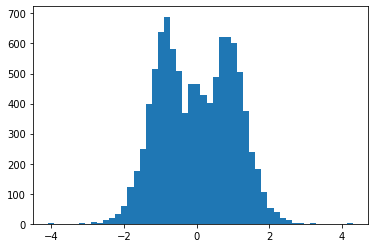

In [17]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 0], bins=50)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,  11.,  25.,
         44.,  75., 129., 169., 324., 394., 539., 639., 632., 598., 433.,
        425., 475., 422., 435., 464., 535., 645., 625., 612., 480., 337.,
        209., 127.,  93.,  51.,  25.,  14.,   4.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-4.08900006, -3.91990959, -3.75081912, -3.58172864, -3.41263817,
        -3.2435477 , -3.07445723, -2.90536675, -2.73627628, -2.56718581,
        -2.39809534, -2.22900486, -2.05991439, -1.89082392, -1.72173345,
        -1.55264297, -1.3835525 , -1.21446203, -1.04537156, -0.87628108,
        -0.70719061, -0.53810014, -0.36900967, -0.19991919, -0.03082872,
         0.13826175,  0.30735222,  0.4764427 ,  0.64553317,  0.81462364,
         0.98371411,  1.15280459,  1.32189506,  1.49098553,  1.660076  ,
         1.82916648,  1.99825695,  2.16734742,  2.33643789,  2.50552837,
         2.67461884,  2.84370931,  3.01279978,  3.18189026,  3.35098073,
 

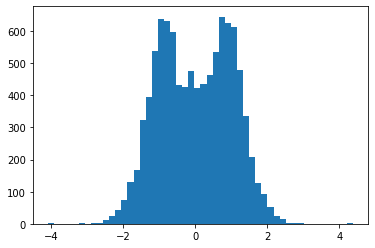

In [18]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 1], bins=50)

(array([200., 199., 201., 200., 199., 201., 201., 198., 200., 199., 200.,
        203., 198., 201., 198., 202., 201., 201., 196., 206., 196., 202.,
        198., 199., 199., 203., 201., 198., 202., 198., 199., 199., 200.,
        203., 200., 198., 201., 203., 195., 201., 202., 199., 202., 197.,
        202., 200., 199., 201., 200., 199.]),
 array([3.84521146e-15, 2.00000000e-02, 4.00000000e-02, 6.00000000e-02,
        8.00000000e-02, 1.00000000e-01, 1.20000000e-01, 1.40000000e-01,
        1.60000000e-01, 1.80000000e-01, 2.00000000e-01, 2.20000000e-01,
        2.40000000e-01, 2.60000000e-01, 2.80000000e-01, 3.00000000e-01,
        3.20000000e-01, 3.40000000e-01, 3.60000000e-01, 3.80000000e-01,
        4.00000000e-01, 4.20000000e-01, 4.40000000e-01, 4.60000000e-01,
        4.80000000e-01, 5.00000000e-01, 5.20000000e-01, 5.40000000e-01,
        5.60000000e-01, 5.80000000e-01, 6.00000000e-01, 6.20000000e-01,
        6.40000000e-01, 6.60000000e-01, 6.80000000e-01, 7.00000000e-01,
        7.

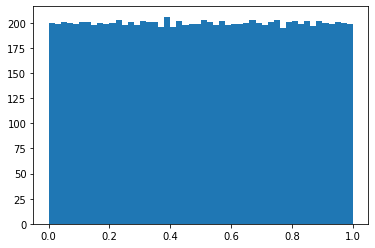

In [19]:
X_u = kde.pipe_.transform(data)
plt.hist(X_u[:, 1], bins=50)

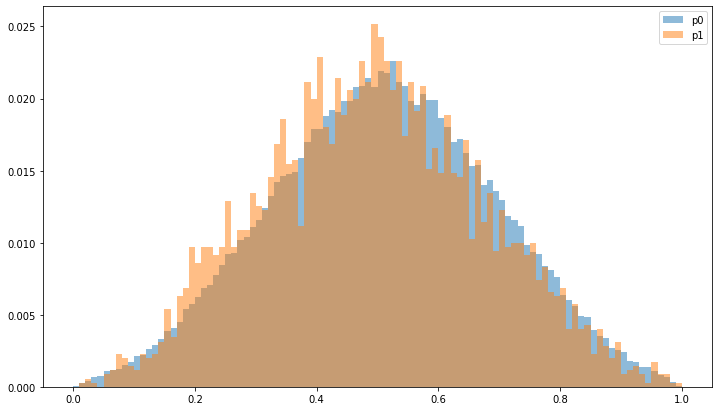

INFO:KDECopulaNNPdf:Maximum weight found: 3.968253573412649


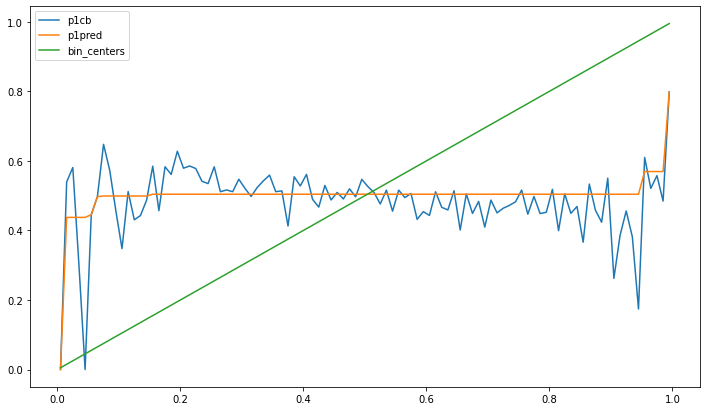

In [20]:
kde._calibrate_classifier(kde.hist_p0_, kde.hist_p1_, kde.bin_edges_, validation_plots=True)

In [21]:
X_gen, sample_weight = kde.sample(200000)

In [22]:
sum(sample_weight)

203367.1168705225

(array([3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.05000e+02,
        1.96000e+02, 0.00000e+00, 1.98773e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 5.98000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.50000e+01]),
 array([0.        , 0.07936507, 0.15873015, 0.23809522, 0.3174603 ,
        0.39682537, 0.47619045, 0.5555555 , 0.6349206 , 0.7142857 ,
        0.79365075, 0.8730158 , 0.9523809 , 1.0317459 , 1.111111  ,
        1.1904761 , 1.2698412 , 1.3492062 , 1.4285713 , 1.507936

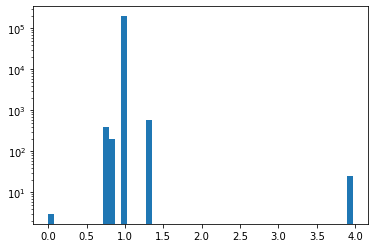

In [23]:
plt.hist(sample_weight, bins=50, log=True)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.011, 0.031,
        0.096, 0.141, 0.247, 0.337, 0.493, 0.527, 0.564, 0.494, 0.392,
        0.339, 0.259, 0.264, 0.366, 0.454, 0.428, 0.377, 0.284, 0.259,
        0.29 , 0.41 , 0.483, 0.558, 0.549, 0.464, 0.386, 0.227, 0.139,
        0.081, 0.026, 0.015, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

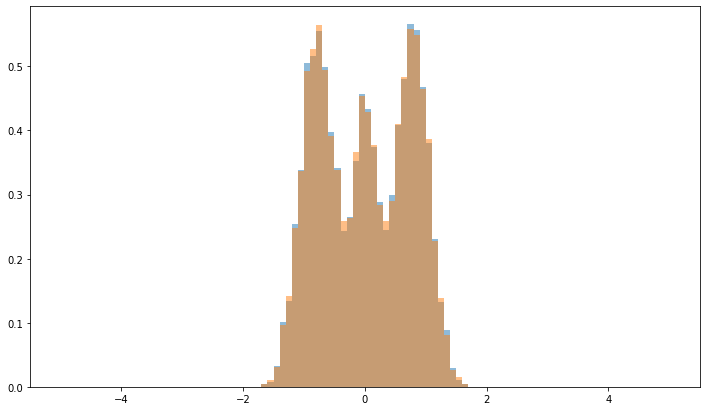

In [24]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.014, 0.03 ,
        0.071, 0.16 , 0.263, 0.357, 0.474, 0.501, 0.556, 0.494, 0.413,
        0.296, 0.28 , 0.294, 0.39 , 0.48 , 0.453, 0.394, 0.275, 0.285,
        0.297, 0.393, 0.488, 0.522, 0.494, 0.443, 0.373, 0.267, 0.118,
        0.074, 0.026, 0.015, 0.006, 0.002, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

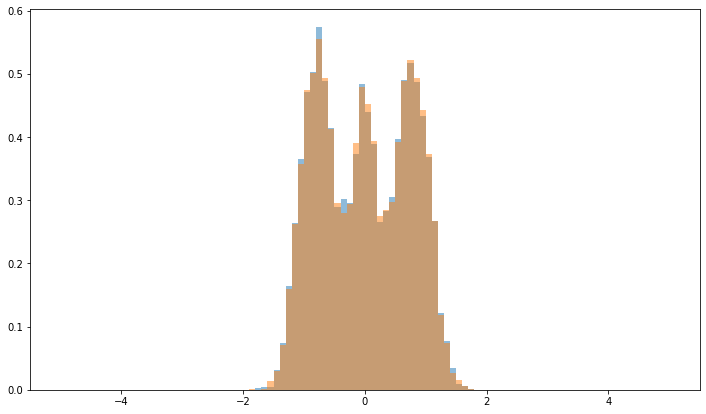

In [25]:
i=1
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

In [26]:
X_gen, sample_weight = kde.sample(data.shape[0])

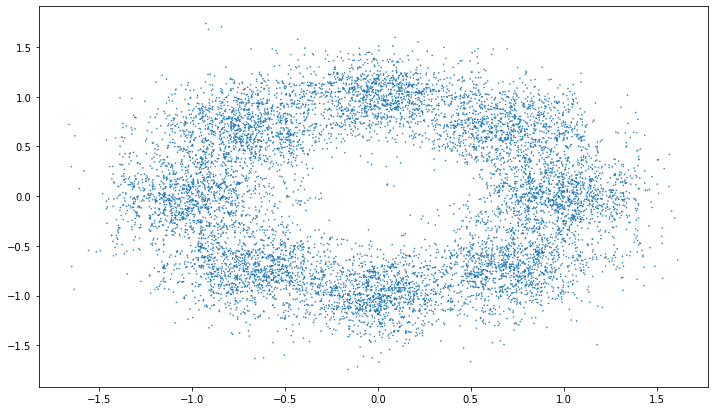

In [27]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.3*sample_weight)

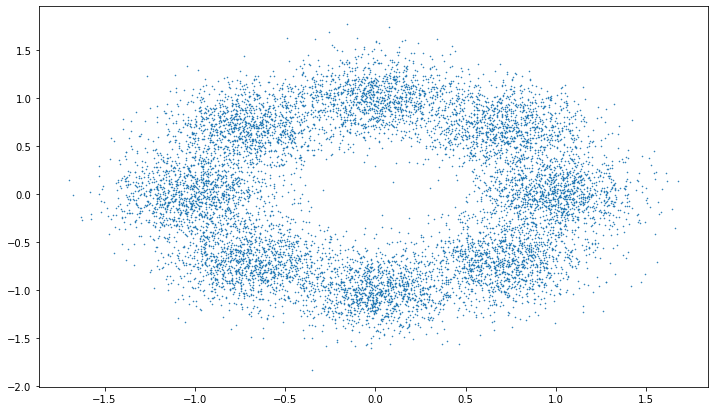

In [28]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(data[:,i], data[:,j], s=0.3)

In [29]:
X_gen = kde.sample_no_weights(200000)

In [30]:
len (X_gen)

68253

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.011, 0.031,
        0.096, 0.141, 0.247, 0.337, 0.493, 0.527, 0.564, 0.494, 0.392,
        0.339, 0.259, 0.264, 0.366, 0.454, 0.428, 0.377, 0.284, 0.259,
        0.29 , 0.41 , 0.483, 0.558, 0.549, 0.464, 0.386, 0.227, 0.139,
        0.081, 0.026, 0.015, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

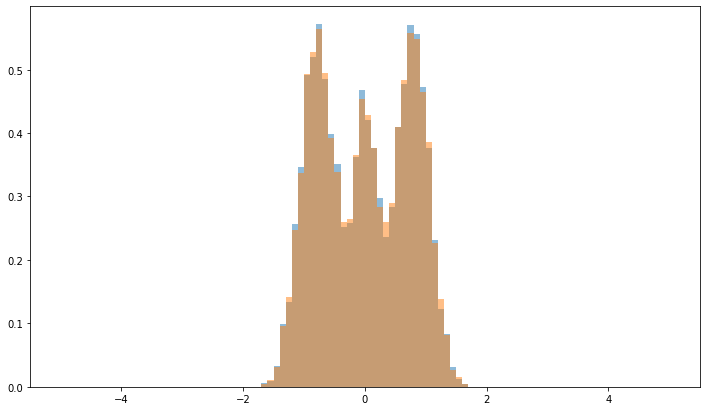

In [31]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

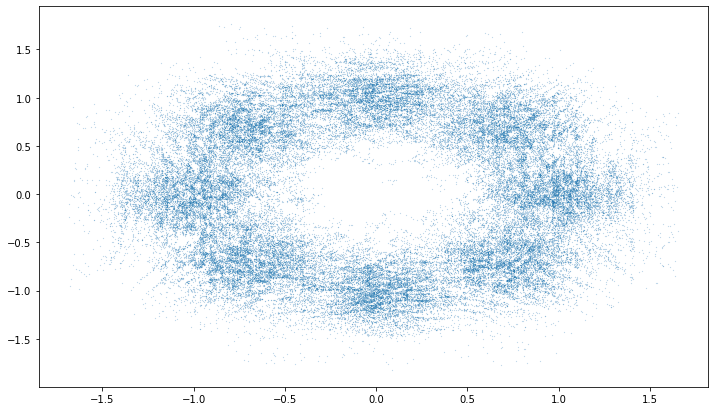

In [32]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.01)

## run sdgym

In [33]:
import sdgym

In [34]:
def KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns):
    # assert len(categorical_columns + ordinal_columns) <= 1

    all_features = list(range(real_data.shape[1]))
    numerical_features = list(set(all_features) - set(categorical_columns + ordinal_columns))
    data = np.float64(real_data)
    
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        reg_lambda=1,
        gamma=0,
        max_depth=9
    )
#     clf = MLPClassifier(alpha=0.1, random_state=0, max_iter=1000, early_stopping=True)
    
    kde = KDECopulaNNPdf(
        use_KDE=False, 
        distinct_threshold=-1,
        n_uniform_bins=50,
    )
    kde = kde.fit(data)
    
    X_gen = kde.sample_no_weights(n_samples, show_progress=True)    
    X_gen = np.float32(X_gen)
    
    print(X_gen[:, :5])

    return X_gen

In [35]:
from sdgym.synthesizers import (
    CLBNSynthesizer, CTGANSynthesizer, IdentitySynthesizer, IndependentSynthesizer,
    MedganSynthesizer, PrivBNSynthesizer, TableganSynthesizer, TVAESynthesizer,
    UniformSynthesizer, VEEGANSynthesizer, CopulaGAN)

all_synthesizers = [
#    IdentitySynthesizer,
#     IndependentSynthesizer,
     KDECopulaNNPdf_Synthesizer,
#    CopulaGAN
#     KDECopulaNNPdf_SynthesizerInteger,
]

In [36]:
scores = sdgym.run(synthesizers=all_synthesizers, datasets=[dataset_name], iterations=1)

INFO:sdgym.benchmark:0%|          | 0/1 [00:00<?, ?it/s]
INFO:sdgym.benchmark:Evaluating KDECopulaNNPdf_Synthesizer on dataset ring; iteration 0; 326.79 MB
INFO:sdgym.data:Loading dataset ring (all variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
INFO:sdgym.benchmark:Running KDECopulaNNPdf_Synthesizer on dataset ring; iteration 0; 326.8 MB
INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.

Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 3.968253573412649
INFO:KDECopulaNNPdf:Generating 35723 data points.

Generating for node: 0: 100%|██████████| 2/2 [00

[[ 1.2078125  -0.07304829]
 [-0.65587205 -0.43312916]
 [-0.27571413 -1.2464865 ]
 ...
 [ 0.7243458   0.34232998]
 [-0.5339231  -0.44261357]
 [ 0.5801179  -0.6446801 ]]


INFO:sdgym.benchmark:Finished KDECopulaNNPdf_Synthesizer on dataset ring; iteration 0; 340.59 MB
INFO:sdgym.benchmark:100%|##########| 1/1 [00:03<00:00,  3.81s/it]


In [37]:
scores

,ring/syn_likelihood,ring/test_likelihood,timestamp
VEEGANSynthesizer,-16.830634,-6.354960,2020-04-12 09:41:35.096775
CLBNSynthesizer,-1.765073,-47.157936,2020-10-17 09:46:54.494331
CTGAN,-6.591324,-2.665281,2020-10-17 09:46:54.494331
CTGANSynthesizer,-7.130586,-2.704076,2020-10-17 09:46:54.494331
CopulaGAN,-6.206166,-2.800043,2020-10-17 09:46:54.494331
GaussianCopulaCategorical,-3.196912,-2.150930,2020-10-17 09:46:54.494331
GaussianCopulaCategoricalFuzzy,-3.179001,-2.154148,2020-10-17 09:46:54.494331
GaussianCopulaOneHot,-3.207624,-2.154493,2020-10-17 09:46:54.494331
IdentitySynthesizer,-1.711104,-1.703451,2020-10-17 09:46:54.494331
IndependentSynthesizer,-2.466013,-1.957090,2020-10-17 09:46:54.494331
